# Plotting Exercises, Part 1

### Exercise 1

Create a pandas dataframe from the "Datasaurus.txt" file using the code: 

Note that the file being downloaded is *not* actually a CSV file. It is tab-delimited, meaning that within each row, columns are separated by tabs rather than commas. We communicate this to pandas with the `delimiter="\t"` option (`"\t"` is how we write a tab, as we will discuss in future lessons). 

In [1]:
import pandas as pd
import numpy as np

pd.set_option("mode.copy_on_write", True)

df = pd.read_csv(
    "https://raw.githubusercontent.com/nickeubank/practicaldatascience"
    "/master/Example_Data/Datasaurus.txt",
    delimiter="\t",
)

### Exercise 2

This dataset actually contains 13 separate example datasets, each with two variables named `example[number]_x` and `example[number]_y`. 

In order to get a better sense of what these datasets look like, write a loop that iterates over each example dataset (numbered 1 to 13) and print out the mean and standard deviation for `example[number]_x` and `example[number]_y` for each dataset. 

For example, the first iteration of this loop might return something like:

```
Example Dataset 1: 
Mean x: 23.12321978429576, 
Mean y: 98.23980921730972, 
Std Dev x: 21.2389710287, 
Std Dev y: 32.2389081209832,
Correlation: 0.73892819281
```

(Though you shouldn't get those specific values)

In [2]:
for i in range(1, 14):
    dataset_name = f"Example Dataset {i}"

    # Select the columns for the current dataset
    x_column = f"example{i}_x"
    y_column = f"example{i}_y"
    dataset = df[[x_column, y_column]]

    # Calculate mean and standard deviation for x and y
    mean_x = dataset[x_column].mean()
    mean_y = dataset[y_column].mean()
    std_dev_x = dataset[x_column].std()
    std_dev_y = dataset[y_column].std()

    # Calculate the correlation
    correlation = dataset[x_column].corr(dataset[y_column])

    # Print the results for the current dataset
    print(f"{dataset_name}:")
    print(f"Mean x: {mean_x}")
    print(f"Mean y: {mean_y}")
    print(f"Std Dev x: {std_dev_x}")
    print(f"Std Dev y: {std_dev_y}")
    print(f"Correlation: {correlation}\n")

Example Dataset 1:
Mean x: 54.266099784295776
Mean y: 47.834720624943664
Std Dev x: 16.769824954043756
Std Dev y: 26.939743419267106
Correlation: -0.06412835216739834

Example Dataset 2:
Mean x: 54.268730022394365
Mean y: 47.83082315530282
Std Dev x: 16.7692394934544
Std Dev y: 26.935726689918788
Correlation: -0.06858639424107657

Example Dataset 3:
Mean x: 54.26731970598592
Mean y: 47.83771726725352
Std Dev x: 16.760012659806083
Std Dev y: 26.930036087838207
Correlation: -0.06834335648025566

Example Dataset 4:
Mean x: 54.26327323943662
Mean y: 47.832252816901416
Std Dev x: 16.765142039116785
Std Dev y: 26.935403486939123
Correlation: -0.06447185270095161

Example Dataset 5:
Mean x: 54.26030345169014
Mean y: 47.839829209014084
Std Dev x: 16.767735488473797
Std Dev y: 26.93019151853346
Correlation: -0.06034144199921762

Example Dataset 6:
Mean x: 54.26144178316902
Mean y: 47.83025191366197
Std Dev x: 16.76589790389934
Std Dev y: 26.93987622043797
Correlation: -0.06171483797263011

Exam

### Exercise 3

Based only on these results, discuss what might you conclude about these example datasets with your partner. Write down your thoughts.

**- The datasets have similar Means and Standard Deviations: The means for both the x and y variables in these datasets are very close to each other. Moreover, the standard deviations for both x and y are also similar across these datasets.**

**- It has negative correlations: this indicates that as x values increase, y values tend to decrease, and vice versa.**

### Execise 4

Write a loop that iterates over these example datasets, and using Altair library, plot a simple scatter plot of each dataset with the `x` variable on the x-axis and the `y` variable on the y-axis.

Hint: When writing this type of code, it is often best to start by writing code to do what you want for the first iteration of the loop. Once you have code that works for the first example dataset, then write the full loop around it. 

Hint 2: To force Jupyter to display your charts when they're generated within a loop, use the method `.show()` (e.g. `my_chart.show()`).

Hint 3: You will need to change the range of the axes to make the plots look good!

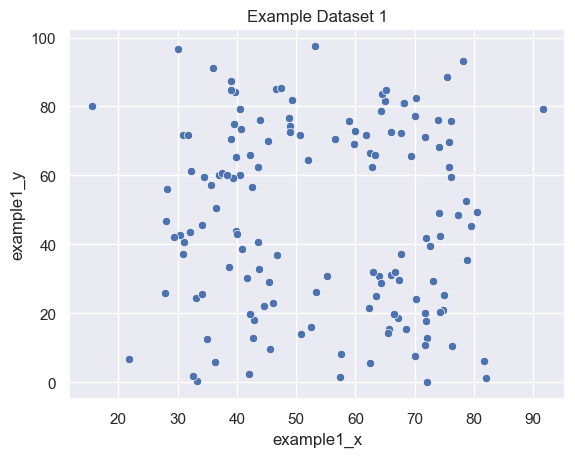

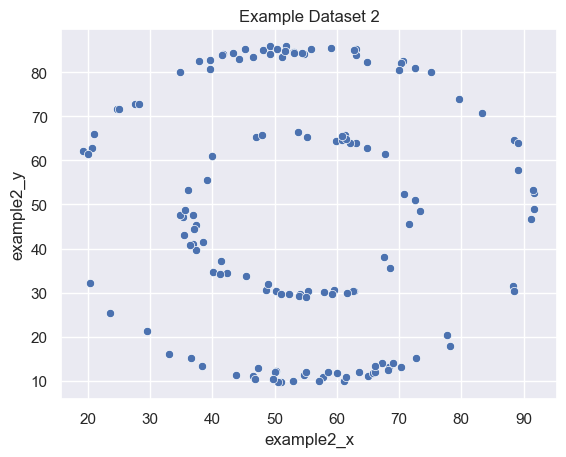

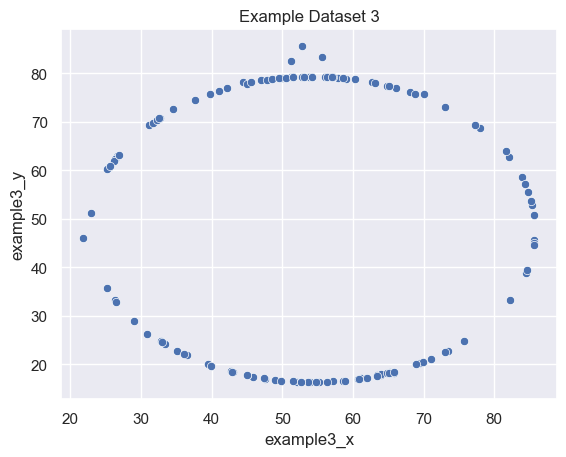

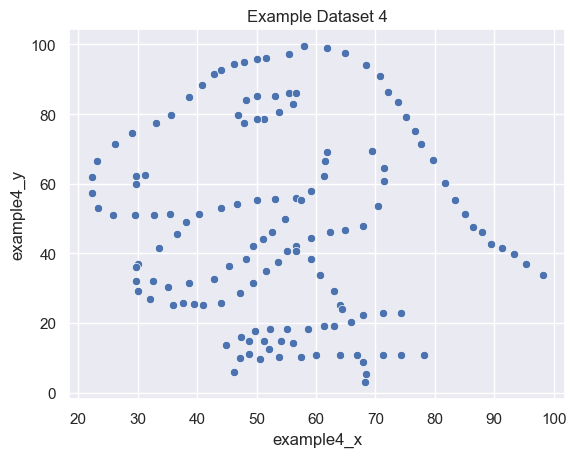

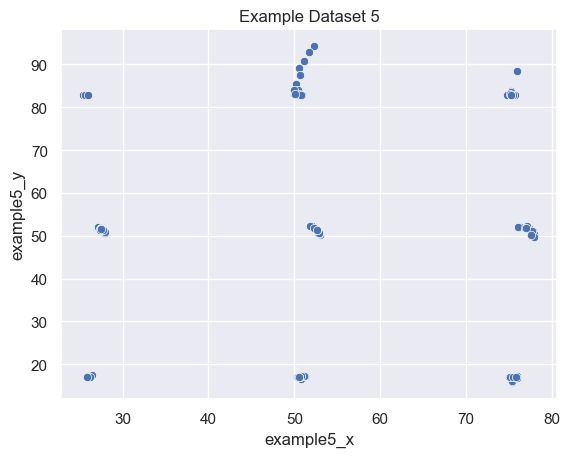

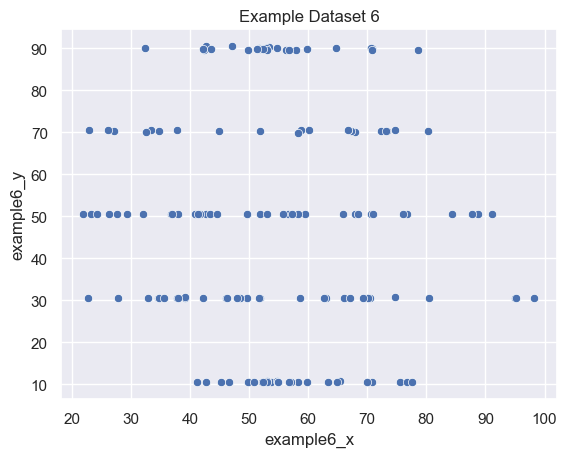

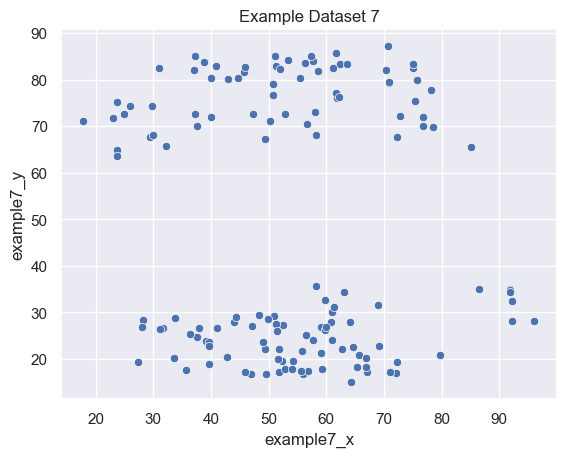

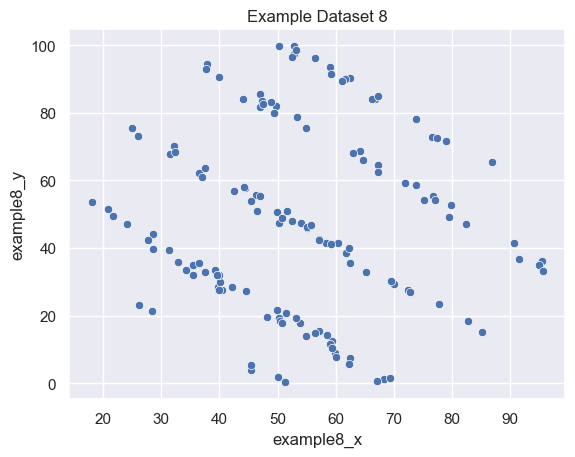

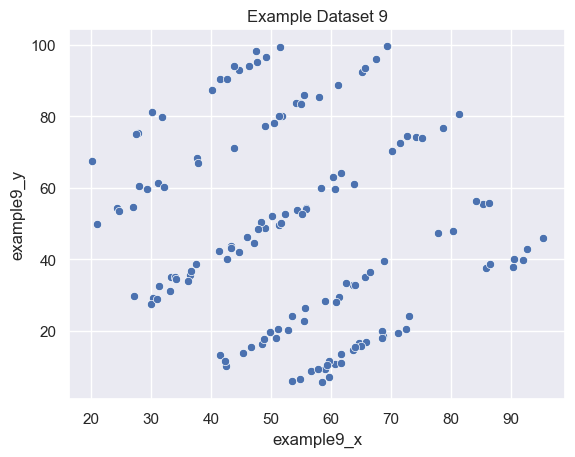

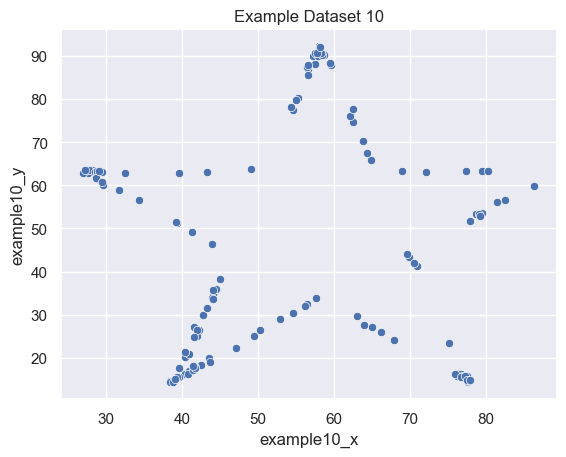

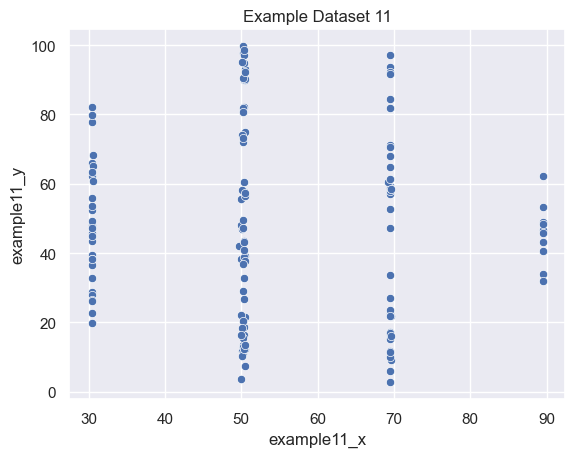

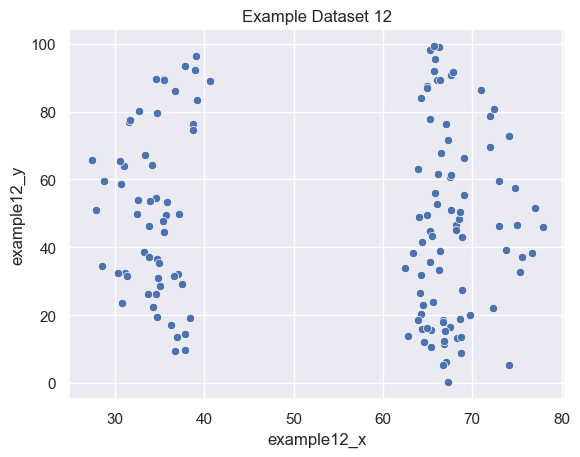

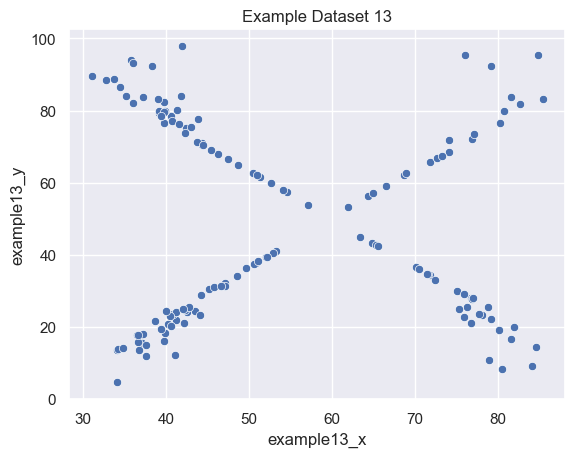

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

# Iterate over each example dataset (1 to 13)
for i in range(1, 14):
    dataset_name = f"Example Dataset {i}"

    # Select the columns for the current dataset
    x_column = f"example{i}_x"
    y_column = f"example{i}_y"
    dataset = df[[x_column, y_column]]

    # Create a scatter plot using Seaborn
    sns.scatterplot(data=dataset, x=x_column, y=y_column)

    # Customize plot labels and title
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(dataset_name)

    # Show the plot for the current dataset
    plt.show()

### Exercise 5

Review you plots. How does your impression of how these datasets differ from what you wrote down in Exercise 3?

*I am so impressed! From Exercise 3, the datasets have similar mean and standard deviation, but I never thought when plotting, it has many interesting shapes like above!*

## Economic Development and... Your Choice!

### Exercise 6

Load the World Development Indicator data used in the [plotting reading](https://nickeubank.github.io/practicaldatascience_book/notebooks/class_5/week_2/20_plotting_with_seaborn.html). Rather than picking a single year, pick a single country and look at how GDP per capita and one of the other variables in that dataset have evolved together over time. 

Make any adjustments to the functional forms of your variables and/or axes needed to make the figure legible. 

In [21]:
wdi_data = (
    "https://raw.githubusercontent.com/nickeubank/"
    "practicaldatascience/master/Example_Data/wdi_plotting.csv"
)
world = pd.read_csv(wdi_data)
world.sample(5)

,Year,Country Name,Country Code,GDP per capita (constant 2010 US$),"Population, total",CO2 emissions (metric tons per capita),"Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population)","PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)","Life expectancy at birth, total (years)","Mortality rate, under-5 (per 1,000 live births)","Literacy rate, youth female (% of females ages 15-24)"
10757,2020,Marshall Islands,MHL,NaN,59194.0,NaN,NaN,NaN,NaN,NaN,NaN
7481,2005,"Korea, Dem. People's Rep.",PRK,NaN,23904167.0,3.245878,NaN,100.0,68.389,33.0,NaN
10159,2017,South Africa,ZAF,7475.166701,57009751.0,7.632729,NaN,100.0,63.538,35.6,96.875893
7326,2004,Sao Tome and Principe,STP,896.879140,153736.0,0.455326,NaN,NaN,64.020,65.6,NaN
441,1973,Argentina,ARG,7453.754449,25056475.0,3.754155,NaN,NaN,67.383,68.1,NaN


In [38]:
gdp_per_capita_column = "GDP per capita (constant 2010 US$)"
mortality_rate_column = "Mortality rate, under-5 (per 1,000 live births)"


country_data = world[
    (world["Country Name"] == "El Salvador")
    & (
        world[gdp_per_capita_column].isin(world[gdp_per_capita_column])
        | world[mortality_rate].isin(world[mortality_rate])
    )
]

country_data

,Year,Country Name,Country Code,GDP per capita (constant 2010 US$),"Population, total",CO2 emissions (metric tons per capita),"Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population)","PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)","Life expectancy at birth, total (years)","Mortality rate, under-5 (per 1,000 live births)","Literacy rate, youth female (% of females ages 15-24)"
59,1971,El Salvador,SLV,2584.483400,3770060.0,0.400737,NaN,NaN,55.320,147.0,NaN
276,1972,El Salvador,SLV,2673.623013,3867310.0,0.434278,NaN,NaN,55.586,143.7,NaN
493,1973,El Salvador,SLV,2735.031841,3964273.0,0.496731,NaN,NaN,55.793,140.0,NaN
710,1974,El Salvador,SLV,2812.868687,4060255.0,0.485892,NaN,NaN,55.948,136.0,NaN
927,1975,El Salvador,SLV,2829.299541,4154689.0,0.507505,NaN,NaN,56.052,131.8,NaN
1144,1976,El Salvador,SLV,2907.208916,4247508.0,0.520588,NaN,NaN,56.110,127.3,NaN
1361,1977,El Salvador,SLV,3039.246451,4338451.0,0.527425,NaN,NaN,56.142,122.4,NaN
1578,1978,El Salvador,SLV,3137.219026,4426679.0,0.540108,NaN,NaN,56.178,117.5,NaN
1795,1979,El Salvador,SLV,2949.801418,4511127.0,0.529997,NaN,NaN,56.248,112.4,NaN
2012,1980,El Salvador,SLV,2557.216889,4591135.0,0.464851,NaN,NaN,56.394,107.0,NaN


### Exercise 7

Now add a second series. Facet your plot so that the two subplots are positioned so that they are effectively sharing the same time axes (e.g., if you draw a line up from 2010 on one plot, you get to 2010 on the other).

Rather than telling you exactly how to do it, however, I'll point you to the [seaborn tutorial](https://seaborn.pydata.org/tutorial/objects_interface#faceting-and-pairing-subplots). It has examples that don't do exactly what you want, but should be close enough you can guess-and-check to the solution you want!

Use your detective skills (and some guess and check work) to figure out how to get it to work!


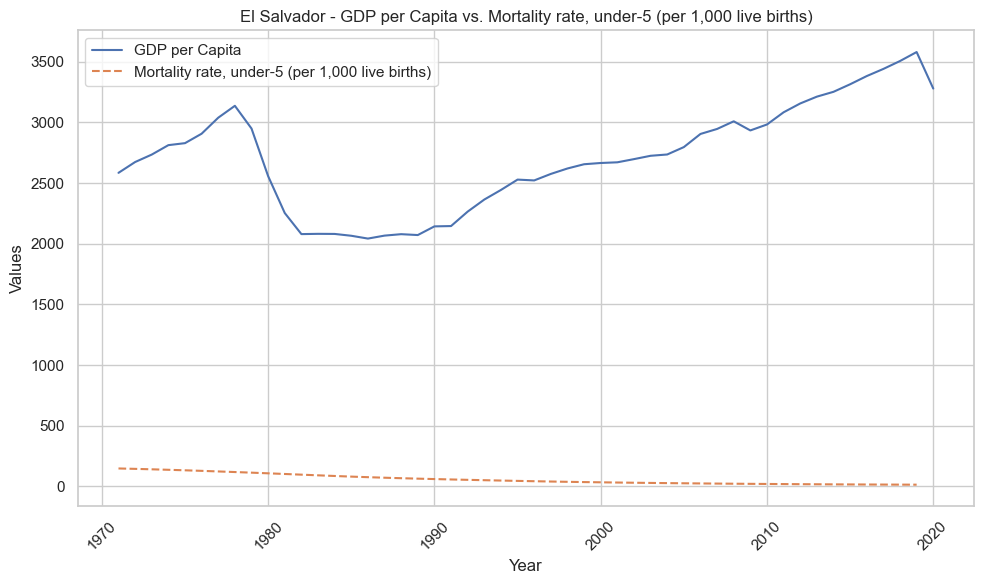

In [40]:
# Extract the year and values for the selected variables
years = country_data["Year"]
gdp_per_capita_values = country_data[gdp_per_capita_column]
mortality_rate_values = country_data[mortality_rate_column]

# Create a plot to visualize the data
plt.figure(figsize=(10, 6))
plt.plot(years, gdp_per_capita_values, label="GDP per Capita")
plt.plot(
    years,
    mortality_rate_values,
    label="Mortality rate, under-5 (per 1,000 live births)",
    linestyle="--",
)

plt.title(
    "El Salvador - GDP per Capita vs. Mortality rate, under-5 (per 1,000 live births)"
)
plt.xlabel("Year")
plt.ylabel("Values")

plt.legend()
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()